<a href="https://colab.research.google.com/github/sriraj934/Stock_price_prediction/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2019-12-17')
print(df)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732142  14.607142  14.621428  14.686786  302220800.0  12.669562
2012-01-04  14.810000  14.617143  14.642858  14.765715  260022000.0  12.737655
2012-01-05  14.948215  14.738214  14.819643  14.929643  271269600.0  12.879071
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  13.013705
2012-01-09  15.276786  15.048214  15.196428  15.061786  394024400.0  12.993064
...               ...        ...        ...        ...          ...        ...
2019-12-11  67.775002  67.125000  67.202499  67.692497   78756800.0  67.112915
2019-12-12  68.139999  66.830002  66.945000  67.864998  137310400.0  67.283928
2019-12-13  68.824997  67.732498  67.864998  68.787498  133587600.0  68.198540
2019-12-16  70.197502  69.245003  69.250000  69.964996  128186000.0  69.365952
2019-12-17  70.442497  69.699997  69.892502  70.1025

In [3]:
df.shape

(2003, 6)

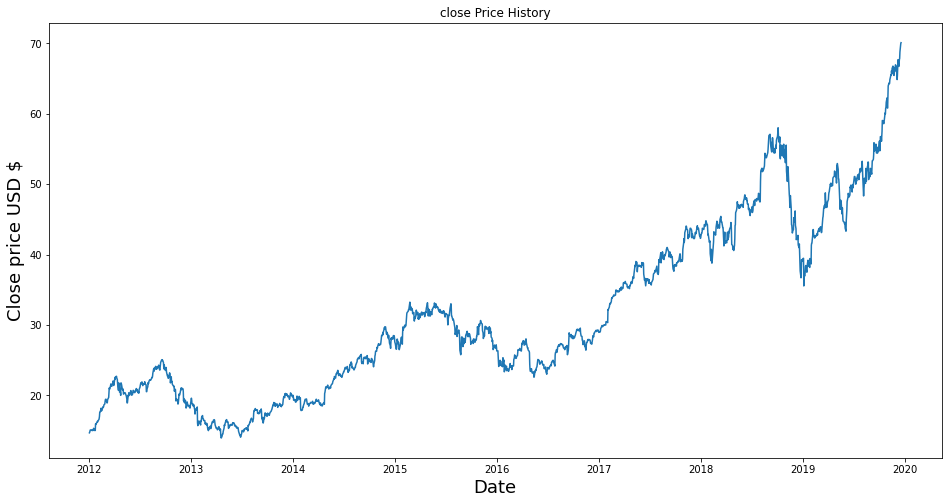

In [4]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD $',fontsize = 18)
plt.show()

In [5]:
training_set = df.iloc[:,3:4].values
training_set_train = math.ceil(len(training_set)*0.8)
training_set_train

1603

Since we have 2003 data(rows) in that we are taking 0.8 percent for training the data and remaing for testing the dataset

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range=(0,1))
training_set_scaler = sc.fit_transform(training_set)
print(training_set_scaler)

[[0.01316509]
 [0.01457064]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [7]:
X_train = []
y_train = []
for i in range(60,1603):
  X_train.append(training_set_scaler[i-60:i,0])
  y_train.append(training_set_scaler[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
print(X_train)
print(y_train)

[[0.01316509 0.01457064 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457064 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train)

[[[0.01316509]
  [0.01457064]
  [0.01748985]
  ...
  [0.13766105]
  [0.14243103]
  [0.14442805]]

 [[0.01457064]
  [0.01748985]
  [0.02026915]
  ...
  [0.14243103]
  [0.14442805]
  [0.13949272]]

 [[0.01748985]
  [0.02026915]
  [0.01984303]
  ...
  [0.14442805]
  [0.13949272]
  [0.13293563]]

 ...

 [[0.52177011]
  [0.51927696]
  [0.51669488]
  ...
  [0.5857448 ]
  [0.59767603]
  [0.5912207 ]]

 [[0.51927696]
  [0.51669488]
  [0.51322235]
  ...
  [0.59767603]
  [0.5912207 ]
  [0.58926183]]

 [[0.51669488]
  [0.51322235]
  [0.51958863]
  ...
  [0.5912207 ]
  [0.58926183]
  [0.58164901]]]


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

In [12]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
regressor.fit(X_train,y_train,batch_size=32,epochs=25)

Epoch 1/25
49/49 [==============================] - 11s 102ms/step - loss: 0.0144
Epoch 2/25
49/49 [==============================] - 5s 109ms/step - loss: 0.0014
Epoch 3/25
49/49 [==============================] - 5s 108ms/step - loss: 0.0017
Epoch 4/25
49/49 [==============================] - 5s 110ms/step - loss: 0.0011
Epoch 5/25
49/49 [==============================] - 5s 108ms/step - loss: 0.0014
Epoch 6/25
49/49 [==============================] - 5s 107ms/step - loss: 0.0012
Epoch 7/25
49/49 [==============================] - 5s 106ms/step - loss: 0.0012
Epoch 8/25
49/49 [==============================] - 5s 111ms/step - loss: 0.0013
Epoch 9/25
49/49 [==============================] - 5s 109ms/step - loss: 0.0012
Epoch 10/25
49/49 [==============================] - 5s 109ms/step - loss: 9.0138e-04
Epoch 11/25
49/49 [==============================] - 5s 109ms/step - loss: 0.0010
Epoch 12/25
49/49 [==============================] - 5s 109ms/step - loss: 9.5213e-04
Epoch 13/25
49/4

In [30]:
#creating the new array containing the scaled vaalues from 1543 to 2003
test_data = training_set_scaler[training_set_train - 60:,:]
#creat the data set X_test and y_test
X_test = []
y_test = training_set[training_set_train:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predictions = regressor.predict(X_test)
predictions = sc.inverse_transform(predictions)
print(predictions)

[[46.364952]
 [46.308254]
 [46.14151 ]
 [45.924347]
 [45.70892 ]
 [45.541103]
 [45.447205]
 [45.436256]
 [45.49635 ]
 [45.602715]
 [45.724865]
 [45.857773]
 [46.009544]
 [46.191708]
 [46.407642]
 [46.64374 ]
 [46.86702 ]
 [47.044384]
 [47.162205]
 [47.212017]
 [47.198864]
 [47.12705 ]
 [47.00941 ]
 [46.84856 ]
 [46.65997 ]
 [46.460552]
 [46.266613]
 [46.078327]
 [45.910843]
 [45.778374]
 [45.697792]
 [45.67408 ]
 [45.713123]
 [45.78983 ]
 [45.88224 ]
 [45.986702]
 [46.11552 ]
 [46.271557]
 [46.430737]
 [46.583973]
 [46.725666]
 [46.847443]
 [46.94498 ]
 [47.00988 ]
 [47.04687 ]
 [47.06158 ]
 [47.061474]
 [47.061897]
 [47.08512 ]
 [47.13965 ]
 [47.20267 ]
 [47.243237]
 [47.243855]
 [47.269157]
 [47.41141 ]
 [47.720554]
 [48.191612]
 [48.756577]
 [49.325836]
 [49.828392]
 [50.208794]
 [50.450027]
 [50.567642]
 [50.596016]
 [50.592197]
 [50.628468]
 [50.734634]
 [50.904846]
 [51.11284 ]
 [51.32875 ]
 [51.530224]
 [51.712967]
 [51.887444]
 [52.08077 ]
 [52.318317]
 [52.61843 ]
 [52.97657 ]

## Visualizing the Graph

The Real Values from 0 to 1603 was split before so 
* train variable has values from 0 to training_set_train(1603)
* valid variable has the values from training_set_train(1603) to end (2003) (Test set)
* so the real value to train our model was train and our predictions was on test set and the real value of test set is (valid)

No handles with labels found to put in legend.


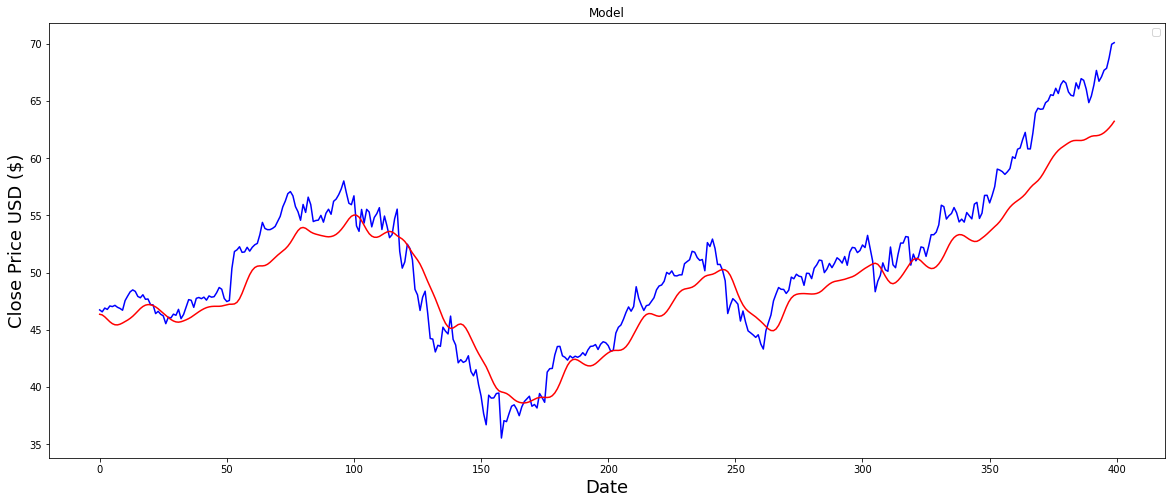

In [38]:
#from 0 to 1603 data is the train data
train = training_set[:training_set_train]
#from 1603 to 2003 is the data actual data
valid = training_set[training_set_train:]
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(valid,color = 'blue')
plt.plot(predictions,color = 'red')
plt.legend()
plt.show()

## Prediction Between actual value and Predicted Value

In [60]:
results = print(np.concatenate((valid.reshape(len(valid),1),predictions.reshape(len(predictions),1)),1))

[[46.74750137 46.36495209]
 [46.57749939 46.30825424]
 [46.90750122 46.14151001]
 [46.79000092 45.92434692]
 [47.09000015 45.70891953]
 [47.03749847 45.54110336]
 [47.14500046 45.44720459]
 [46.97499847 45.43625641]
 [46.875      45.49634933]
 [46.71749878 45.60271454]
 [47.56000137 45.72486496]
 [47.95750046 45.85777283]
 [48.32749939 46.00954437]
 [48.49499893 46.19170761]
 [48.36500168 46.40764236]
 [47.92499924 46.64374161]
 [47.80749893 46.86701965]
 [48.06999969 47.044384  ]
 [47.67499924 47.16220474]
 [47.70000076 47.21201706]
 [47.20999908 47.19886398]
 [47.18500137 47.12704849]
 [46.42250061 47.00941086]
 [46.625      46.84856033]
 [46.36500168 46.65996933]
 [46.22999954 46.46055222]
 [45.54249954 46.26661301]
 [46.10749817 46.07832718]
 [46.04000092 45.9108429 ]
 [46.375      45.77837372]
 [46.27750015 45.69779205]
 [46.79499817 45.6740799 ]
 [45.97999954 45.71312332]
 [46.34999847 45.78982925]
 [46.99250031 45.8822403 ]
 [47.64500046 45.98670197]
 [47.58750153 46.11552048]
 